In [1]:
import matplotlib.pyplot as plt
import torch


def get_available_devices():
    devices = ["cpu"]

    # Check if CUDA (NVIDIA GPU) is available and list all available CUDA devices
    if torch.cuda.is_available():
        for i in range(torch.cuda.device_count()):
            devices.append(f"cuda:{i}")

    # Check for MPS (Apple's Metal Performance Shaders) availability
    if torch.backends.mps.is_available():
        devices.append("mps")

    return devices

In [3]:
get_available_devices()

['cpu', 'mps']

In [1]:
from tardis_em.utils.load_data import load_image

img, px = load_image(
    "../test_data/Predictions/T0649_Monopole_Grid08B_cell06_sec04.rec_flattrim.rec-2_semantic.mrc"
)

In [2]:
from tardis_em.dist_pytorch.utils.utils import VoxelDownSampling
from tardis_em.dist_pytorch.utils.build_point_cloud import BuildPointCloud
import numpy as np

coordinates_HD = np.random.random((10000, 3))
post_processes = VoxelDownSampling(voxel=5, labels=False, KNN=True)
ld = post_processes(coordinates_HD)

ValueError: array is not broadcastable to correct shape

In [4]:
coord = coordinates_HD
sampling = 5
voxel_index = np.floor(coord / sampling).astype(np.int32)

In [10]:
unique_voxel_index, inverse_index, voxel_counts = np.unique(
    voxel_index, axis=0, return_inverse=True, return_counts=True
)
if inverse_index.ndim == 2:
    inverse_index = inverse_index[:, 0]
voxel_centers = np.zeros((len(unique_voxel_index), 3))
np.add.at(voxel_centers, inverse_index, coord)

In [24]:
print(voxel_centers.shape, inverse_index.shape, coord.shape)

(201, 3) (571, 1) (571, 3)


In [40]:
sampling = 5
# Find the grid cell index for each point
voxel_index = np.floor(coord / sampling).astype(np.int32)

# Compute the unique set of voxel indices
unique_voxel_index, inverse_index, voxel_counts = np.unique(
    voxel_index, axis=0, return_inverse=True, return_counts=True
)

# Compute the centroids of each voxel
voxel_centers = np.zeros((len(unique_voxel_index), 3))
for i in range(len(coord)):
    voxel_centers[inverse_index[i]] += coord[i]
voxel_centers /= voxel_counts[:, np.newaxis]

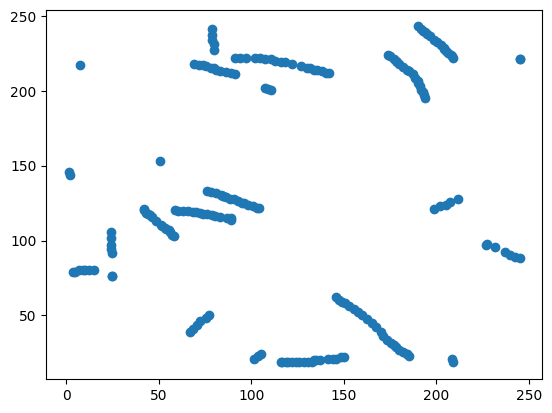

In [41]:
plt.scatter(voxel_centers[:, 0], voxel_centers[:, 1])

In [14]:
np.random.random((65, 4)).dtype

dtype('float64')

In [ ]:
from tardis_em.utils.load_data import load_image

img, px = load_image("../test_data/20240321_b2g1_ts34.mrc")